In [39]:
#AUTORS: PEDRO MARTI PICO (DNI: 41574536N), CARLOS ECKER OLIVER (DNI: 43202285M)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pip
pip.main(['install','seaborn'])
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
#Dataframe del tinto 
tinto = pd.read_csv('winequality-red.csv', sep = ';')
#Cream un valor fixe del tipus de vi
tinto["type"] = "tinto" 
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


In [3]:
#Dataframe del vi blanc
blanc = pd.read_csv('winequality-white.csv', sep = ';')
#Cream un valor fixe del tipus de vi
blanc["type"] = "blanc" 
blanc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


In [4]:
#Juntam els dos datasets 'blanc' i 'tinto'
vins = pd.concat([blanc, tinto])
vinsaux = pd.concat([blanc, tinto])
vins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


In [5]:
#Mostram la quantiat de vins que hi ha de cada tipus
vins.groupby('type').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
blanc,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
tinto,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


In [6]:
#Transformam la columna type en valors numerics, on blanc=0 i tint=1
label_quality=LabelEncoder()
vins["type"]=label_quality.fit_transform(vins["type"])
vinsaux["type"]=label_quality.fit_transform(vinsaux["type"])



In [7]:
#Veim que els types de vi ara son numerics
vins.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

<AxesSubplot:>

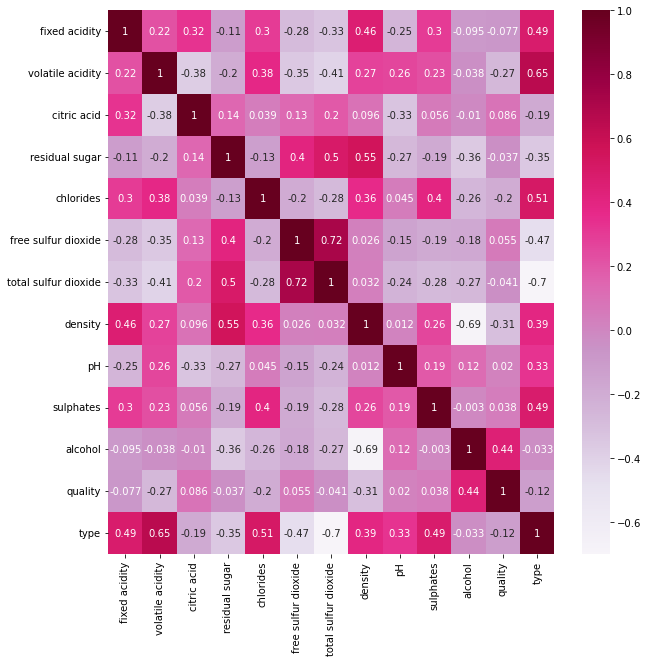

In [8]:
#Tabla que mostra les correlacions entre cada característica del vi
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

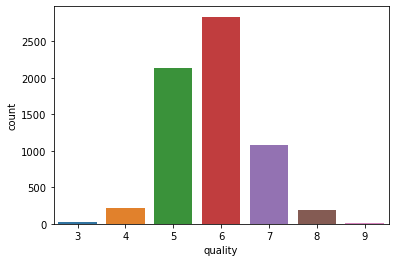

In [9]:
#Gràfic que mostra la quantitat de vins de cada qualitat
sns.countplot(x='quality', data=vins)

In [10]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vinsaux["quality"]
vinsaux.drop("quality", axis=1, inplace=True)
X = vinsaux.values 

In [11]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [12]:
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))
#Para empezar podemos ver que los valores que tienen menos muestras no presentan predicciones y por tanto sy recall es 
#de 0, esto es debido a que el algoritmo tiene menos "training" con estos resultados y por tanto es mas dificil acertar 
#estos valores.
#En el caso del 4 vemos que tiene una precision de 1 pero un recall de 0,01. Esto quiere decir que probablemente ha 
#predecido un 4 y era un 4, de allí la precisión, pero al haber 71 4 y solo predecir 1, tiene un recall de 0,01.
#Como vemos, a medida que aumenta el número de muestras, el recall aumenta, y esto es debido a que al tener más ejemplos
#tiende a predecir mas los valores que más ha visto, de alli el alto recall y la precisión es mas baja debido a que
#probablemente predice vinos de esa calidad cuando no lo son

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.01      0.03        71
           5       0.60      0.63      0.62       707
           6       0.53      0.73      0.61       939
           7       0.50      0.13      0.20       364
           8       0.00      0.00      0.00        57

    accuracy                           0.55      2145
   macro avg       0.44      0.25      0.24      2145
weighted avg       0.55      0.55      0.51      2145



In [14]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#En el caso del perceptrón podemos ver que solo predice los dos valores con más muestras, es por ello que su recall es 
#más elevado que en el caso anterior, el problema que tiene es que su % de predicción es más bajo
#Comparado con el Logistic Regression podemos decir que no lo mejora ya que sus weighted avg son menores en ambos casos

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        71
           5       0.47      0.90      0.62       707
           6       0.49      0.40      0.44       939
           7       0.00      0.00      0.00       364
           8       0.00      0.00      0.00        57

    accuracy                           0.47      2145
   macro avg       0.16      0.22      0.18      2145
weighted avg       0.37      0.47      0.40      2145



In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#En este caso podemozs ver que los valores de precisión son parecidos en todos los datos con una muestra significativa,
#además estos son más elevados que con los otros dos algoritmos y vienen acompañados de un alto recall, de allí que su
#weighted avg sea el más alto. Podemos decir que es el que tiene más éxito para predecir resultados-

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.62      0.07      0.13        71
           5       0.68      0.72      0.70       707
           6       0.64      0.76      0.69       939
           7       0.68      0.48      0.56       364
           8       0.89      0.30      0.45        57

    accuracy                           0.66      2145
   macro avg       0.59      0.39      0.42      2145
weighted avg       0.66      0.66      0.64      2145



In [16]:
#Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)
print(vins)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vins["quality"]
X = vinsaux.values 

In [18]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [19]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))
#Con las calidades divididas en 3, las muestras de cada valor son mayores y por tanto podemos afirmar que las 
#predicciones seran mas altas que en al caso anterior, algo que confirma la tabla.
#Podemos ver que en el caso de vinos buenos, pese a que la muestra es alta, no obtiene un recall alto y esto es debido a
#que el número de muestras de los otros dos es mucho mayor que el de bueno y por tanto el algoritmos tiende a clasificar
#estos vinos en otra de las dos categorias

              precision    recall  f1-score   support

          bo       0.59      0.26      0.36       421
      dolent       0.65      0.67      0.66       785
       mitja       0.53      0.66      0.59       939

    accuracy                           0.58      2145
   macro avg       0.59      0.53      0.54      2145
weighted avg       0.59      0.58      0.57      2145



In [20]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#Con las calidades cambiadas, podemos ver que el perceptrón se iguala un poco más a la regresión logítica, y por tanto
#podemos decir que este cambio lo ha beneficiado más

              precision    recall  f1-score   support

          bo       0.45      0.31      0.37       421
      dolent       0.67      0.60      0.63       785
       mitja       0.51      0.63      0.57       939

    accuracy                           0.56      2145
   macro avg       0.54      0.51      0.52      2145
weighted avg       0.56      0.56      0.55      2145



In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#El Random Forest sigue teniendo unos resultados bastante buenos pero es el que mejora menos respecto al cambio.

              precision    recall  f1-score   support

          bo       0.75      0.56      0.64       421
      dolent       0.73      0.75      0.74       785
       mitja       0.65      0.71      0.68       939

    accuracy                           0.70      2145
   macro avg       0.71      0.67      0.69      2145
weighted avg       0.70      0.70      0.70      2145



In [22]:
#Apartat B
#Tornam a donar-li les dades originals a vi per poder fer els tests amb els requeriments de B
vins = pd.concat([blanc, tinto])

<AxesSubplot:>

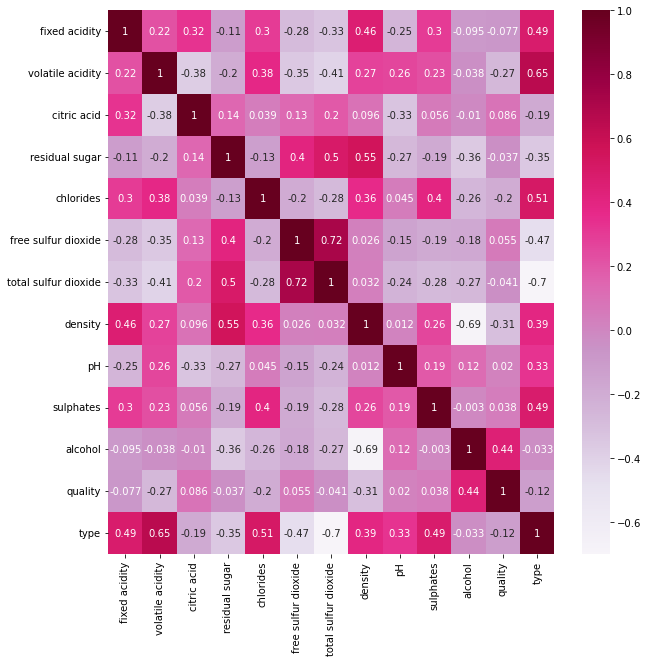

In [23]:
#Transformam la columna type en valors numerics, on blanc=0 i tint=1
label_quality=LabelEncoder()
vins["type"]=label_quality.fit_transform(vins["type"])

#Tabla que mostra les correlacions entre cada característica del vi
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

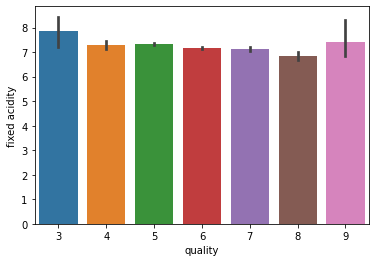

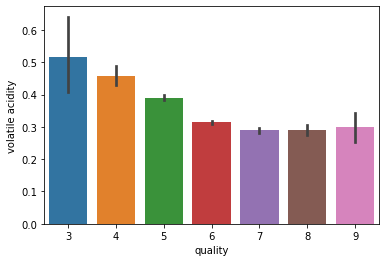

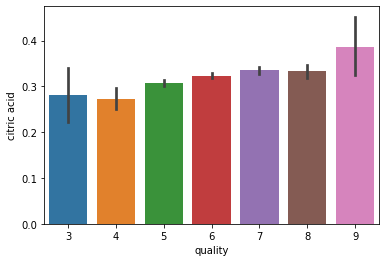

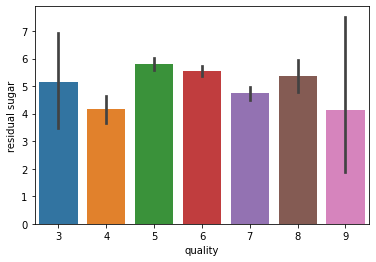

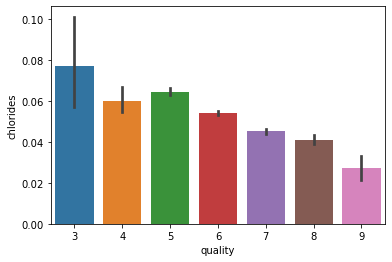

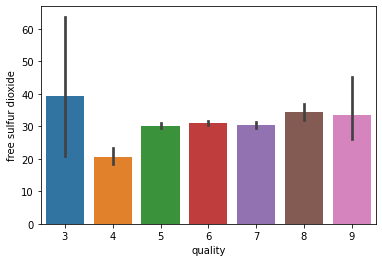

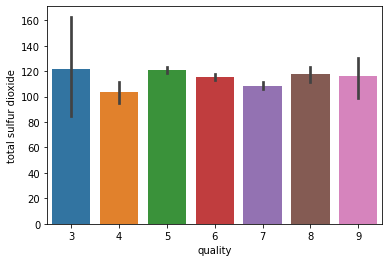

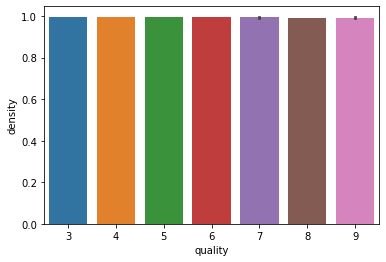

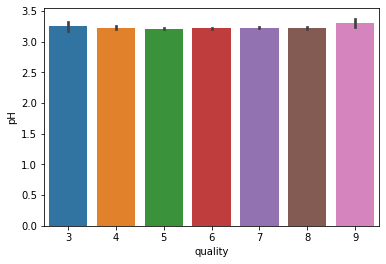

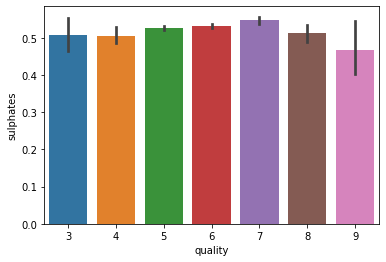

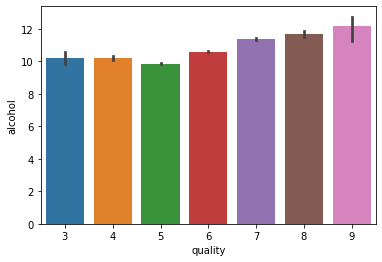

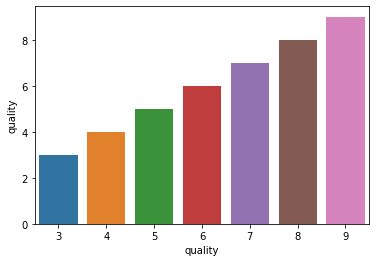

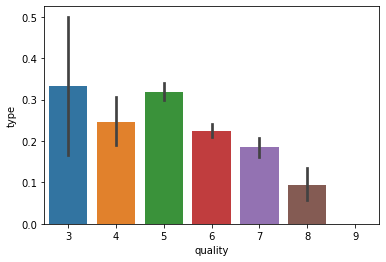

In [24]:
#Mostram una taula de la correlació que te cada columna amb el valor resultant de "quality" perque sigui més visual
vinsaux=vins.select_dtypes([int,float])
for i, col in enumerate(vins.columns):
    plt.figure(i)
    sns.barplot(x="quality",y=col,data=vinsaux)

In [25]:
#Llevam les columnes que tenen una correlació entre (-0.1,0.1) amb la "quality" ja que la seva relació amb els valors 
#de la qualitat es molt baixa i per tant son dades que molesten als algorismes a l'hora de prediure ja que adquireixen
#més importancia de la que mereixen
column_1 = vins["quality"]
for i, col in enumerate(vins.columns):
    column_2 = vins[col]
    corre = column_1.corr(column_2)  
    if corre < 0.1:
        if corre > -0.1:
            vins.drop(col, axis=1, inplace=True)
    
                      

<AxesSubplot:>

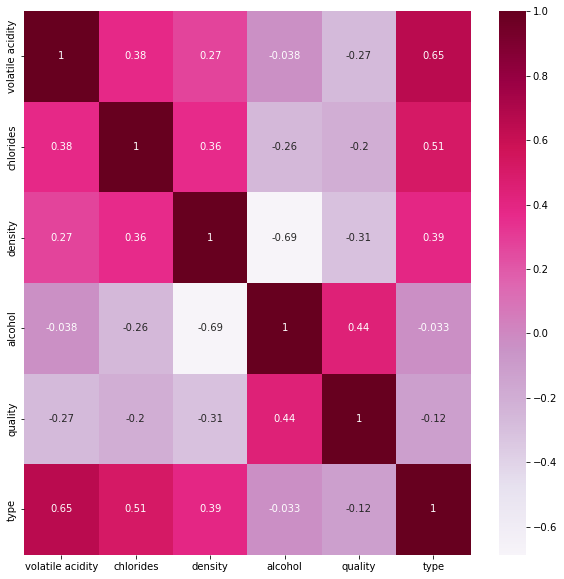

In [26]:
#Mostram el mapa de correlacions amb les columnes menys rellevants ja llevades
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

In [27]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vins["quality"]
X = vinsaux.values 

In [28]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [29]:
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [30]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))
#Podemos ver que el hecho de haber quitado las columnas con menos correlación ha ayudado bastante en las predicciones.
#Esto es debido a que el algoritmo daba la misma importancia a todas las columnas, y las que hemos quitado no ayudaban
# a la predicción de la calidad, por tanto ahora el algoritmo no da importancia a los datos que no tenian relevancia
#Vemos que los datos con muestras pequeñas no varian ya que sigue siendo dificil sacar conclusiones con tan pocos 
#ejemplos, pero los valores con mas datos son mucho más precisos.

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.03      0.05        71
           5       0.90      1.00      0.95       707
           6       0.97      1.00      0.98       939
           7       0.85      0.92      0.89       364
           8       0.00      0.00      0.00        57

    accuracy                           0.92      2145
   macro avg       0.62      0.49      0.48      2145
weighted avg       0.90      0.92      0.90      2145



In [31]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#Con el perceptrón pasa lo mismo, pero tiene una precisión más baja que la regresión logística

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.06      0.10        71
           5       0.86      0.97      0.91       707
           6       0.75      0.96      0.85       939
           7       0.61      0.25      0.35       364
           8       0.00      0.00      0.00        57

    accuracy                           0.78      2145
   macro avg       0.48      0.37      0.37      2145
weighted avg       0.74      0.78      0.73      2145



In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#El Random Forest, es el que obtiene una mejora más notoria puesto que obtiene una precisión de casi el 100%, solo 
#fallando en la predicción de algunos 3 como 4 y algún 8 como 7

              precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.93      1.00      0.97        71
           5       1.00      1.00      1.00       707
           6       1.00      1.00      1.00       939
           7       1.00      1.00      1.00       364
           8       1.00      0.98      0.99        57

    accuracy                           1.00      2145
   macro avg       0.99      0.88      0.90      2145
weighted avg       1.00      1.00      1.00      2145



In [33]:
#Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)

In [34]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vins["quality"]
X = vinsaux.values 

In [35]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [36]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))
#Vemos que dividiendo los cualidades en buena, media y mala, la precisión es del 100% puesto que ahora tiene más muestras
#de cada tipo y además ya no tiene las columnas menos relevantes

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [37]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#El perceptrón mejora con la division de calidades pero no logra la perfección como el algoritmo anterior

              precision    recall  f1-score   support

          bo       0.89      1.00      0.94       421
      dolent       0.75      1.00      0.86       785
       mitja       1.00      0.67      0.80       939

    accuracy                           0.86      2145
   macro avg       0.88      0.89      0.87      2145
weighted avg       0.89      0.86      0.85      2145



In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#El Random Forest consigue tener un 100% de precisión debido a que sus fallos cuando no se habian dividido las calidades
#eran en la cofusión de 3 con 4 y 7 con 8 y ahora estos estan agrupados en el mismo grupo, dolent y bo respectivamente.

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145

